In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
commercial_data = pd.read_csv('advertising.csv')


In [3]:
commercial_data.head()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


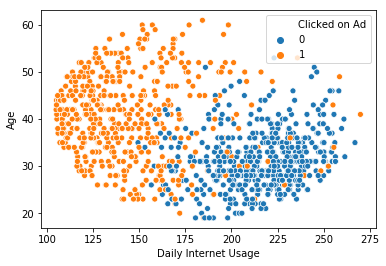

In [4]:
sns.scatterplot(x='Daily Internet Usage', y='Age',hue='Clicked on Ad', data=commercial_data)


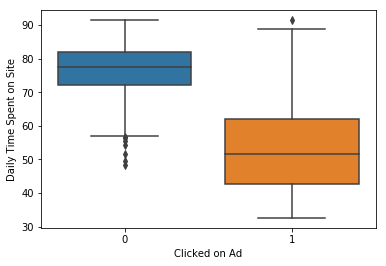

In [5]:
sns.boxplot(y='Daily Time Spent on Site', x='Clicked on Ad', data=commercial_data)


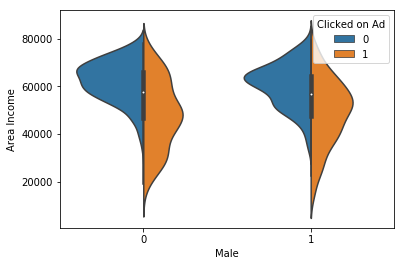

In [8]:
sns.violinplot(x='Male', y='Area Income', hue='Clicked on Ad', split=True, data=commercial_data)


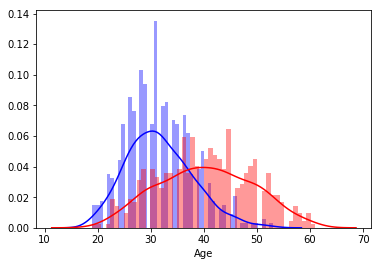

In [7]:
sns.distplot(commercial_data[commercial_data['Clicked on Ad'] == 0]['Age'], kde=True, bins=50, color='blue' )
sns.distplot(commercial_data[commercial_data['Clicked on Ad'] == 1]['Age'], kde=True, bins=50, color='red' )

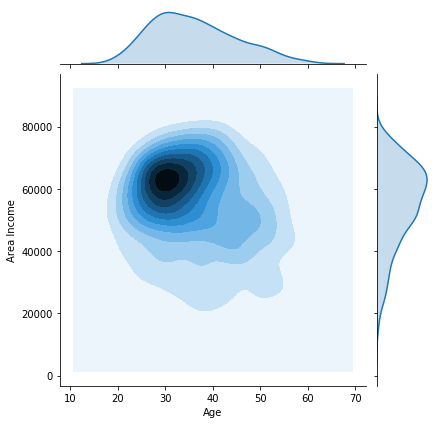

In [9]:
sns.jointplot('Age','Area Income', data=commercial_data, kind='kde')


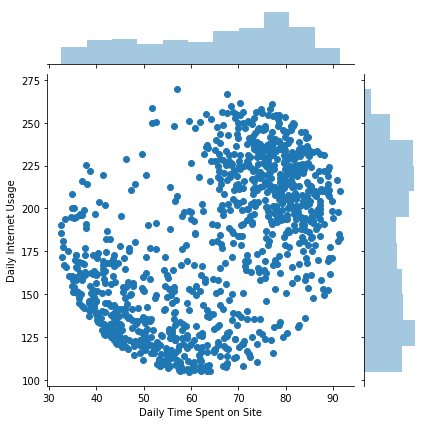

In [10]:
sns.jointplot('Daily Time Spent on Site', 'Daily Internet Usage', data=commercial_data, kind='scatter')


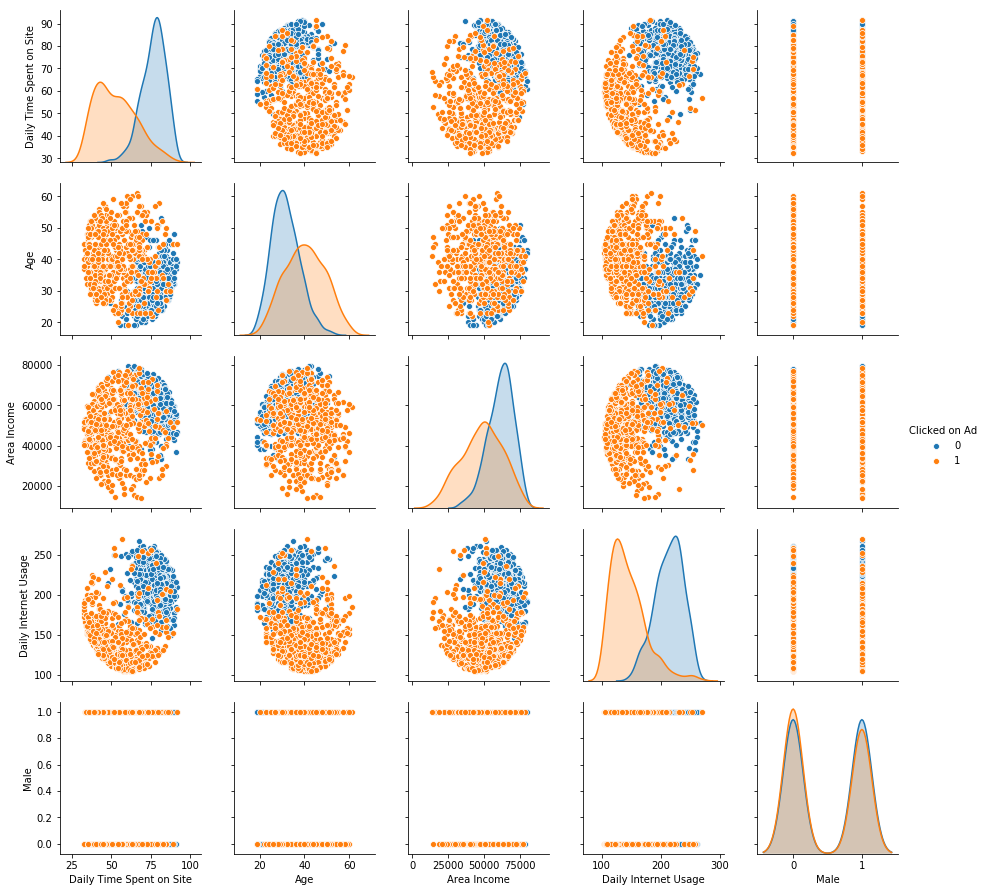

In [37]:
numerical_columns = [column for column in commercial_data.columns if commercial_data[column].dtype!='object']
sns.pairplot(data=commercial_data, vars=numerical_columns[:-1], hue='Clicked on Ad')


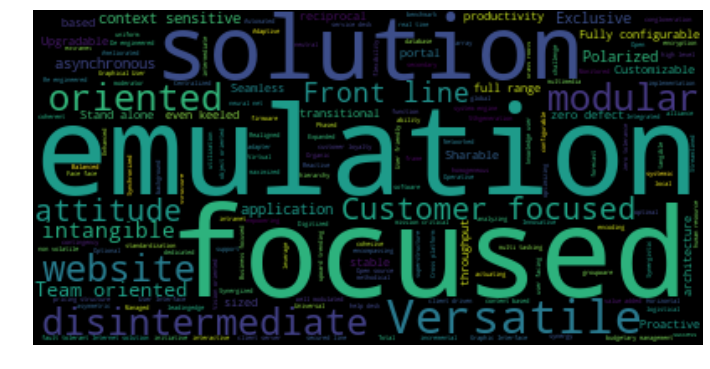

In [28]:
from wordcloud import WordCloud
text = " ".join(line for line in commercial_data[commercial_data['Clicked on Ad'] == 1]['Ad Topic Line'] )
wordcloud = WordCloud().generate(text)


plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

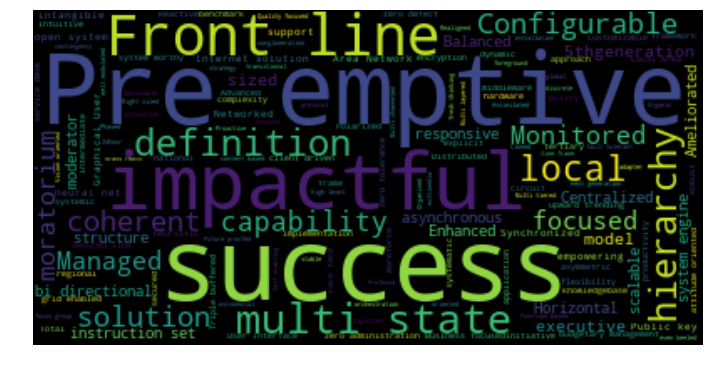

In [38]:
text = " ".join(line for line in commercial_data[commercial_data['Clicked on Ad'] == 0]['Ad Topic Line'] )
wordcloud = WordCloud().generate(text)


plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [41]:
from sklearn.model_selection import train_test_split

X = commercial_data[numerical_columns]
y = commercial_data['Clicked on Ad']

In [45]:
# For base model lets just use the numerical columns to predict whether the person clicked on the ad

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier 
dtc_clf = DecisionTreeClassifier()
adaboost_clf = AdaBoostClassifier(base_estimator=dtc_clf)

# Learning rate
learning_rates = [x for x in np.linspace(0.01, 0.5, 3)]
# Number of trees 
n_estimators = [int(x) for x in [10, 20, 30]]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 20, 3)]
max_depth.append(None)
#Min sample for splitting a node
min_sample_splits = [int(x) for x in np.linspace(2,100,10)]
# Create the random grid
random_grid = {'learning_rate': learning_rates,
               'n_estimators': n_estimators,
               'base_estimator__max_depth': max_depth}

adaboost_clf_reg = RandomizedSearchCV(estimator = adaboost_clf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, scoring = 'f1_weighted', n_jobs = -1).fit(X_train,y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.3s finished


In [47]:
adaboost_clf_reg.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.255, n_estimators=10, random_state=None)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, auc
adaboost_clf_reg.fit(X_train, y_train)

y_pred_adaboost = adaboost_clf_reg.predict(X_test)

print(confusion_matrix(y_pred_adaboost, y_test))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  30 | elapsed:    0.1s remaining:    0.6s


[[105   0]
 [  0  95]]


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.4s finished
